Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Missing values:
 UserID       0
ProductID    0
Rating       0
Timestamp    0
dtype: int64


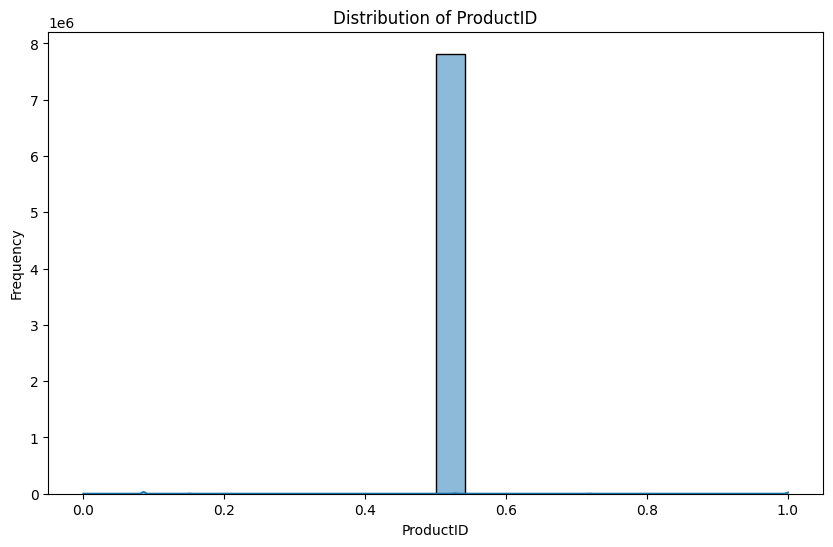

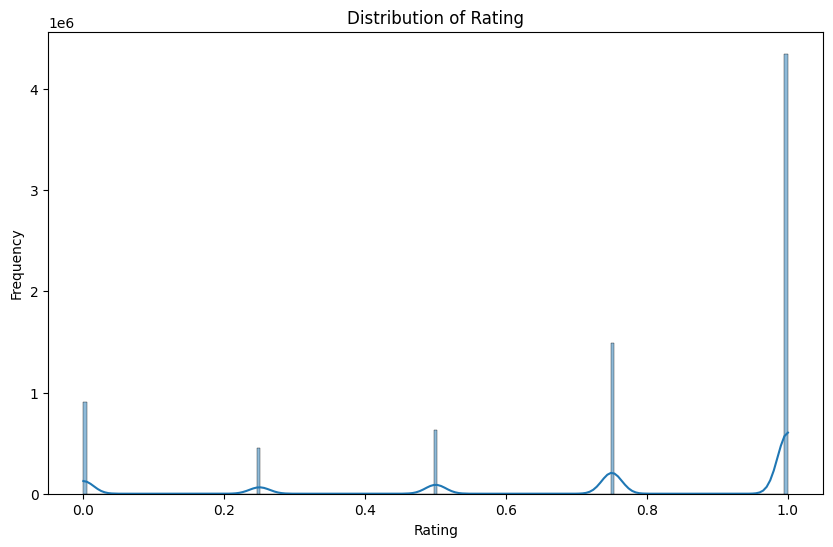

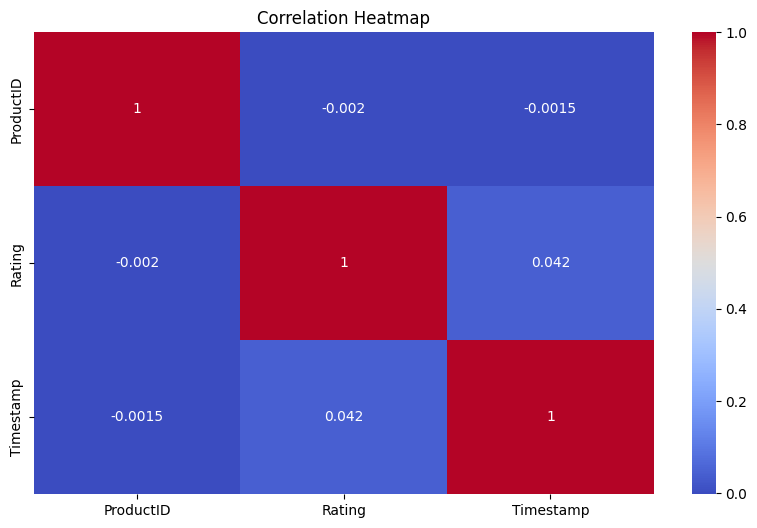

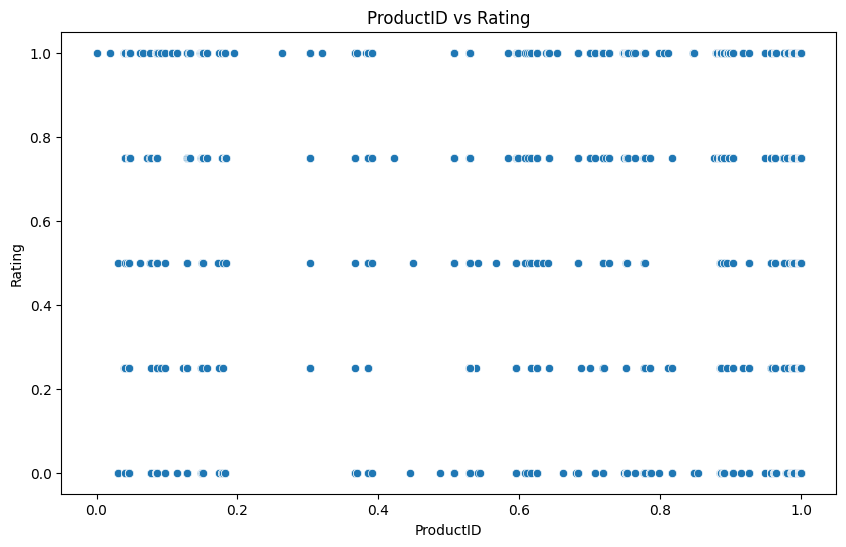

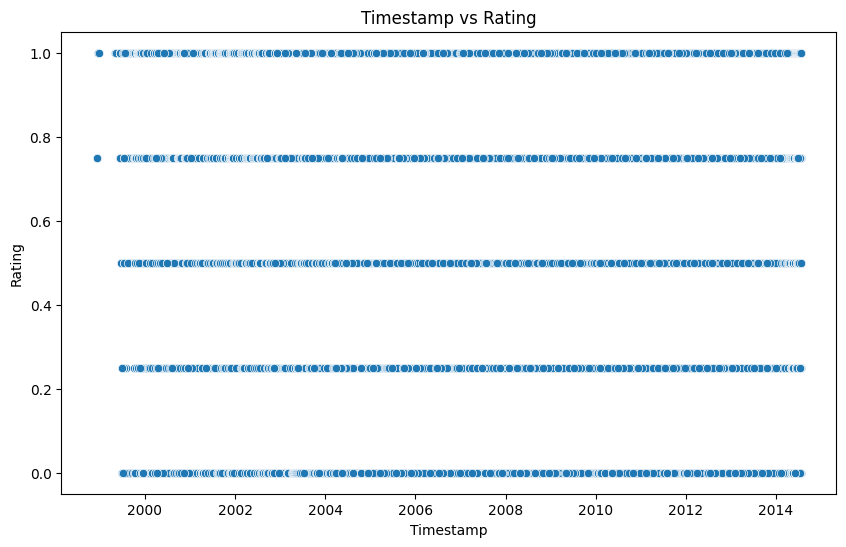

In [11]:
# @title Data Cleaning, Normalize, and Visualize

from google.colab import drive
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
drive.mount('/content/drive')

# Step 1: Load the Data
file_path = "/content/drive/My Drive/UAS_AI/Rekomendasi.csv"
dt = pd.read_csv(file_path, header=None, names=['UserID', 'ProductID', 'Rating', 'Timestamp'])

# Step 2: Clean the Data
dt.columns = dt.columns.str.strip()

# Check for missing values
print("Missing values:\n", dt.isnull().sum())

# Remove duplicate rows
dt = dt.drop_duplicates()

# Convert 'Timestamp' to datetime format for better analysis
dt['Timestamp'] = pd.to_datetime(dt['Timestamp'], unit='s')

# Convert 'ProductID' to numeric, handling non-numeric values
dt['ProductID'] = pd.to_numeric(dt['ProductID'], errors='coerce')

# Fill NaN values in 'ProductID' with the mean of the column
dt['ProductID'].fillna(dt['ProductID'].mean(), inplace=True)

# Step 3: Normalize the Data
scaler = MinMaxScaler()
dt[['ProductID', 'Rating']] = scaler.fit_transform(dt[['ProductID', 'Rating']])

# Step 4: Visualize the Data

# Distribution of 'ProductID'
plt.figure(figsize=(10, 6))
sns.histplot(dt['ProductID'], kde=True)
plt.title('Distribution of ProductID')
plt.xlabel('ProductID')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'Rating'
plt.figure(figsize=(10, 6))
sns.histplot(dt['Rating'], kde=True)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap (excluding 'UserID' column)
plt.figure(figsize=(10, 6))
sns.heatmap(dt.drop(columns=['UserID']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot of 'ProductID' vs 'Rating'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ProductID', y='Rating', data=dt)
plt.title('ProductID vs Rating')
plt.xlabel('ProductID')
plt.ylabel('Rating')
plt.show()

# Scatter plot of 'Timestamp' vs 'Rating'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Timestamp', y='Rating', data=dt)
plt.title('Timestamp vs Rating')
plt.xlabel('Timestamp')
plt.ylabel('Rating')
plt.show()

In [12]:
# @title Data Preparation

from google.colab import drive
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Mount Google Drive
drive.mount('/content/drive')

# Load the data from the UAS_AI folder in Google Drive
file_path = "/content/drive/My Drive/UAS_AI/Rekomendasi.csv"
dt = pd.read_csv(file_path, header=None, names=['UserID', 'ProductID', 'Rating', 'Timestamp'])

# Convert 'Timestamp' to datetime format
dt['Timestamp'] = pd.to_datetime(dt['Timestamp'], unit='s')

# Extract features from 'Timestamp'
dt['Year'] = dt['Timestamp'].dt.year
dt['Month'] = dt['Timestamp'].dt.month
dt['Day'] = dt['Timestamp'].dt.day
dt['Hour'] = dt['Timestamp'].dt.hour

# Drop the original 'Timestamp' column
dt.drop(columns=['Timestamp'], inplace=True)

# Convert 'ProductID' to numeric, handling non-numeric values
dt['ProductID'] = pd.to_numeric(dt['ProductID'], errors='coerce')
dt['ProductID'].fillna(dt['ProductID'].mean(), inplace=True)

# Bin 'Rating' into categories
bins = [0, 2, 4, 5]
labels = ['Low', 'Medium', 'High']
dt['Rating'] = pd.cut(dt['Rating'], bins=bins, labels=labels, include_lowest=True)

# Convert categorical 'Rating' to numeric labels
label_encoder = LabelEncoder()
dt['Rating'] = label_encoder.fit_transform(dt['Rating'])

# Normalize the data
scaler = StandardScaler()
dt[['ProductID', 'Year', 'Month', 'Day', 'Hour']] = scaler.fit_transform(dt[['ProductID', 'Year', 'Month', 'Day', 'Hour']])

# Split the data
X = dt[['ProductID', 'Year', 'Month', 'Day', 'Hour']]
y = dt['Rating']  # Assuming Rating is the target for classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the training and testing sets
print(f'Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Training set shape: X_train: (6259585, 5), y_train: (6259585,)
Testing set shape: X_test: (1564897, 5), y_test: (1564897,)


In [13]:
# @title Model Training

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import joblib

# Train the model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Save model to Google Drive
joblib.dump(model, "/content/drive/My Drive/UAS_AI/logistic_regression_model.pkl")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5555362429603993
Precision: 0.3086205172425558
Recall: 0.5555362429603993
Confusion Matrix:
 [[869357      0      0]
 [272055      0      0]
 [423485      0      0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      1.00      0.71    869357
           1       0.00      0.00      0.00    272055
           2       0.00      0.00      0.00    423485

    accuracy                           0.56   1564897
   macro avg       0.19      0.33      0.24   1564897
weighted avg       0.31      0.56      0.40   1564897



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['/content/drive/My Drive/UAS_AI/logistic_regression_model.pkl']

In [14]:
# @title Test Model

import joblib
import pandas as pd
from sklearn.metrics import classification_report

# Load the model
model = joblib.load("/content/drive/My Drive/UAS_AI/logistic_regression_model.pkl")

# Predict on the test set
y_pred_test = model.predict(X_test)

# Evaluate the model on test data
class_report_test = classification_report(y_test, y_pred_test)
print("Classification Report on Test Data:\n", class_report_test)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.56      1.00      0.71    869357
           1       0.00      0.00      0.00    272055
           2       0.00      0.00      0.00    423485

    accuracy                           0.56   1564897
   macro avg       0.19      0.33      0.24   1564897
weighted avg       0.31      0.56      0.40   1564897



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# @title Purchase Recommendation Interface

import ipywidgets as widgets
from IPython.display import display
import joblib
import numpy as np

# Load the trained model
model = joblib.load("/content/drive/My Drive/UAS_AI/logistic_regression_model.pkl")

# Create input widgets
product_id_widget = widgets.FloatText(description='Product ID:')
year_widget = widgets.IntSlider(value=2023, min=2000, max=2024, description='Year:')
month_widget = widgets.IntSlider(value=1, min=1, max=12, description='Month:')
day_widget = widgets.IntSlider(value=1, min=1, max=31, description='Day:')
hour_widget = widgets.IntSlider(value=0, min=0, max=23, description='Hour:')
output_widget = widgets.Output()

# Function to make predictions and display result
def predict_recommendation(_):
    product_id = product_id_widget.value
    year = year_widget.value
    month = month_widget.value
    day = day_widget.value
    hour = hour_widget.value

    # Normalize inputs
    input_data = np.array([[product_id, year, month, day, hour]])
    scaler = StandardScaler()
    normalized_input = scaler.fit_transform(input_data)

    # Make prediction
    prediction = model.predict(normalized_input)
    rating_labels = ['Low', 'Medium', 'High']
    recommended_rating = rating_labels[int(prediction)]

    with output_widget:
        output_widget.clear_output()
        print(f"Recommended Rating: {recommended_rating}")

# Button to make predictions
predict_button = widgets.Button(description='Predict Recommendation')
predict_button.on_click(predict_recommendation)

# Display the interface
display(product_id_widget, year_widget, month_widget, day_widget, hour_widget, predict_button, output_widget)


FloatText(value=0.0, description='Product ID:')

IntSlider(value=2023, description='Year:', max=2024, min=2000)

IntSlider(value=1, description='Month:', max=12, min=1)

IntSlider(value=1, description='Day:', max=31, min=1)

IntSlider(value=0, description='Hour:', max=23)

Button(description='Predict Recommendation', style=ButtonStyle())

Output()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
<ipython-input-16-c8a41030f491>:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  recommended_rating = rating_labels[int(prediction)]
